In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import math as mt
import matplotlib.pyplot as plt

In [2]:
arr=np.loadtxt("seeds_dataset.txt")
arr2=np.loadtxt("data_banknote_authentication.txt",delimiter=',')
print "Seeds DataSet\n",arr
print "Banknote Dataset\n",arr2


Seeds DataSet
[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]
Banknote Dataset
[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]


In [3]:
def fileToArray(str1):
    arr=np.loadtxt(str1,delimiter=',')
    return arr

In [4]:
def K_Fold_Cross_Validation(K,x_train,y_train,x_test,y_test):
    nfolds=K
    folds=[]
    
    for i in range(nfolds):
        flditem=[]
        flditem.append((x_train[i*(len(x_train)/nfolds):(i+1)*(len(x_train)/nfolds),:]))
        flditem.append((y_train[i*(len(y_train)/nfolds):(i+1)*(len(y_train)/nfolds),:]))
        flditem.append((x_test[i*(len(x_test)/nfolds):(i+1)*(len(x_test)/nfolds),:]))
        flditem.append((y_test[i*(len(y_test)/nfolds):(i+1)*(len(y_test)/nfolds),:]))

        folds.append(flditem)


    return folds



In [5]:
def train_bayes(x_train,y_train):
    xnptrain=np.asarray(x_train)
    ynptrain=np.asarray(y_train)
    xy_train=xnptrain
    xy_train=np.c_[xy_train,ynptrain]
    classes=np.unique(y_train)
    probOfClasses=[0]*len(classes)
    mnArr=[[]]*len(classes)
    stdArr=[[]]*len(classes)
    
    for i in range(len(classes)):
        trainArr=xy_train[xy_train[:,len(xy_train[0])-1]==classes[i]]
        mnArr[i]=np.mean(trainArr,axis=0)
        stdArr[i]=np.std(trainArr,axis=0)
        probOfClasses[i]=float(len(trainArr))/float(len(xnptrain))
    return (classes,mnArr,stdArr,probOfClasses)

In [6]:
def test_bayes(x_test,classes,mnArr,stdArr,probOfClasses):
    probClasses=[0]*len(classes)
    P_Cx=0
    for i in range(len(classes)):
        P_xC=1
        for j in range (len(mnArr[0]) -1):
            P_xC=P_xC * ((1/(stdArr[i][j]*mt.sqrt(2*mt.pi))) * mt.exp((-(x_test[j]-mnArr[i][j])**2)/(2*(stdArr[i][j]**2))))
            
        #P_C=float((len(xy_train[xy_train[:,len(xy_train[0])-1]==classes[i]]))/float(len(xnptrain)))
        P_Cx=probOfClasses[i]* P_xC
        probClasses[i]=P_Cx

    ind=np.argmax(probClasses)
    return classes[ind]

# 

# Main


In [7]:
def main_(arr,K):
    print arr
    x=arr[:,:len(arr[0])-1]
    y=arr[:,len(arr[0])-1:]
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

    
    folds= K_Fold_Cross_Validation(K,x_train,y_train,x_test,y_test)
    print "\nPredicted Class , Actual Class\n"
    summ=0
    accArr=[]
    for j in range(K):

        acc=0
        classes,mnArr,stdArr,probOfClasses=train_bayes(folds[j][0],folds[j][1])
        print "Fold ",j+1
        for i in range(len(folds[j][2])):
            pred_class=test_bayes(folds[j][2][i],classes,mnArr,stdArr,probOfClasses)
            print pred_class,",",folds[j][3][i]
            if (pred_class==folds[j][3][i]):
                acc+=1
        acc=(float(acc)/float(len(folds[j][3])))*100
        accArr.append(acc)
        summ+=acc
        print "Accuracy of fold ",j+1," is: ",acc
    print "Mean Accuracy: ",summ/K
    return accArr

Banknote Dataset

In [8]:
arr=np.loadtxt("data_banknote_authentication.txt" , delimiter=',')
K=5
accArr1=main_(arr,K)


[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]

Predicted Class , Actual Class

Fold  1
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [1.]
0.0 , [1.]
1.0 , [0.]
1.0 , [1.]
1.0 , [0.]
0.0 , [1.]
1.0 , [1.]
1.0 , [1.]
1.0 , [1.]
1.0 , [1.]
0.0 , [0.]
0.0 , [0.]
1.0 , [1.]
0.0 , [0.]
1.0 , [1.]
0.0 , [0.]
0.0 , [0.]
1.0 , [1.]
0.0 , [0.]
0.0 , [0.]
0.0 , [1.]
0.0 , [0.]
0.0 , [0.]
1.0 , [1.]
1.0 , [1.]
0.0 , [0.]
0.0 , [1.]
0.0 , [1.]
1.0 , [1.]
0.0 , [0.]
0.0 , [0.]
0.0 , [1.]
0.0 , [1.]
0.0 , [0.]
1.0 , [1.]
1.0 , [1.]
1.0 , [1.]
0.0 , [0.]
1.0 , [0.]
0.0 , [1.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [0.]
0.0 , [1.]
0.0 , [0.]
0.0 , [0

Seeds Dataset

In [9]:
arr=np.loadtxt("seeds_dataset.txt")
K=5
accArr2=main_(arr,K)

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]

Predicted Class , Actual Class

Fold  1
1.0 , [1.]
3.0 , [3.]
2.0 , [2.]
1.0 , [3.]
1.0 , [1.]
3.0 , [3.]
1.0 , [1.]
3.0 , [3.]
2.0 , [1.]
3.0 , [3.]
2.0 , [2.]
3.0 , [3.]
3.0 , [3.]
2.0 , [2.]
Accuracy of fold  1  is:  85.7142857143
Fold  2
1.0 , [1.]
2.0 , [2.]
3.0 , [3.]
1.0 , [1.]
3.0 , [3.]
2.0 , [2.]
2.0 , [2.]
1.0 , [1.]
3.0 , [3.]
2.0 , [2.]
2.0 , [2.]
3.0 , [3.]
1.0 , [1.]
2.0 , [2.]
Accuracy of fold  2  is:  100.0
Fold  3
1.0 , [1.]
3.0 , [3.]
3.0 , [3.]
3.0 , [1.]
2.0 , [2.]
1.0 , [1.]
2.0 , [2.]
2.0 , [2.]
3.0 , [3.]
2.0 , [2.]
2.0 , [2.]
3.0 , [3.]
1.0 , [3.]
3.0 , [3.]
Accuracy of fold  3  is:  85.7142857143
Fold  4
3.0 , [3.]
2.0 , [2.]
3.0

{'boxes': [<matplotlib.lines.Line2D at 0xccaa1d0>,
 'caps': [<matplotlib.lines.Line2D at 0xcd1ad30>,
 'fliers': [<matplotlib.lines.Line2D at 0xcd30cf8>,
 'means': [<matplotlib.lines.Line2D at 0xcd30a20>,
 'medians': [<matplotlib.lines.Line2D at 0xcd30518>,
 'whiskers': [<matplotlib.lines.Line2D at 0xcd1a6d8>,
  <matplotlib.lines.Line2D at 0xcd3c470>]}

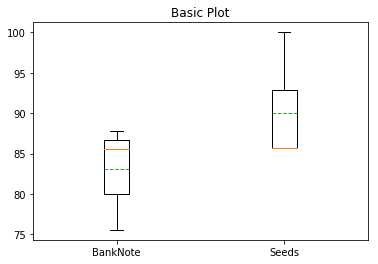

In [10]:

accData=[accArr1,accArr2]
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
lbl=["BankNote","Seeds"]
ax1.boxplot(accData,meanline=True,showmeans=True,labels=lbl)